In [55]:
import numpy as np
import pandas as pd
import altair as alt
import statsmodels.api as sm
from scipy import linalg
from statsmodels.multivariate.pca import PCA

alt.data_transformers.disable_max_rows()
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [56]:
fertility = pd.read_csv('data/fertility.csv')
country = pd.read_csv('data/country-indicators.csv')
gender = pd.read_csv('data/gender-data.csv')

## Fertity Rates
by Alice Zhang 

### Abstract
This research project examines the decline in fertility rates acrossed select developed nations in 2018. We investigate the relationships between fertility, economic welfare, and social welfare by analyzing the contribution of select country, gender, and social indicators to total fertility rates. 

Since we are working with a relatively small data set which includes only a subset of all possible indicators, our results will not be generalizable to all countries. Because the data only pertains to the year 2018, our results are not reflective of patterns / trends that may occur across time. There will be inherent biases due to missingness. In addition, we cannot account for all possible confounds. 


## Introduction

### Background

Over the late 50 years the global fertility rate has halved. The modernization of socieities – bringing improved health and lower mortality rates – was coupled with a stark decline in fertility rates. We in turn saw accelerated population growth. This rapid population growth was predicted to come to an end as the fertility rate declines and approaches [2 children per woman](https://ourworldindata.org/fertility-rate#data-sources). Today (as of 2021), the global fertility rate is 1.66 and [falling](https://www.cbo.gov/publication/58912#:~:text=In%20CBO's%20projections%2C%20the%20total,where%20it%20remains%20through%202053). The total fertility rate is measured as the average number of children per woman.  


[Current perspectives](https://ourworldindata.org/fertility-rate#data-sources) propose that this sharp decline in fertility rates is due to the social mobility of women – through education, labor force participation, and strengthened women’s rights – and the increased well-being and status of children. We seek to examine such perspectives in exploring the relationship between fertility rates and country, gender, and human development indicators. 


### Sources

Data are sourced from the Human Development Reports published by the [United Nations Development Programme](https://www.undp.org/) and World Development Indicators published by the [World Bank](https://data.worldbank.org/). Preprocessed datasets were imported from lab06. 

### Motivation

From an economic standpoint, improved welfare should *increase* fertility rates. Modernization has largely increased the success of reproduction by increasing access to resources such as immunizations and thus decreasing mortality. The pre-modern era was characterized by high mortality rates and a plethora of unpreventable disease; yet, fertility rates were higher than ever. Was it always a matter of scarcity? Could it be that women viewed reproducing as more desirable back then, purely because they had little opportunity to do so?

Modern researchers are also interested in the impact of social mobility and status enchancement on fertility. As modernization takes course, women are becoming increasingly more career-oriented, shrinking the wage gap and breaking the glass ceiling. Does upward social mobility and a shift in social conventions lead women to reject gender normative roles such as bearing children? 


In this project, we seek to examine both perspectives. Potential questions of interest include: 

* Which indicators are most likely to be predictive of a country’s fertility rate? 
* Does improved well-being reduce individuals’ willingness to reproduce? 
* How does the upward social mobility of women impact the fertility rate? 
* How well do our selected factors explain fertility rate?  


### Data Description

Our datasets measures human development indices, world development indices, and gender development indices of countries around the world. We have merged HDI (Human Development Index) and GDI (Gender Development Index) data based on country, and extracted both gender and non-gender data from the WDI (World Development Index) dataset to produce the current datasets. 

We will focus on the variables GDP per capita, immunization, life expectancy at birth, expected years of schooling, as well as two derived variables HDI and GDI, and analyze them in relation to total fertility rates. 

The Human Development Index (HDI) is a summary measure of achievements in three key dimensions of human development: health, measured by life expectancy; education, measured by expected and mean years of schooling; and standard of living, measured by GNI per capita (2017 PPP$). The HDI is the geometric mean of normalized indices for each of the three dimensions. The Gender Development Index (GDI) measures gender inequalities in achievement in three dimensions of human development: health, measured by female and male life expectancy at birth; education, measured by female and male expected years of schooling for children and female and male mean years of schooling for adults ages 25 years and older; and command over economic resources, measured by female and male estimated earned income. Technical details will not be discussed; more information can be found [here](https://hdr.undp.org/system/files/documents/technical-notes-calculating-human-development-indices.pdf). 

GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products, excluding the value of depreciation. Data are in current U.S. dollars. The immunization rate and is calculated as an average of the percentage of children ages 12-23 months who has received a DPT immunization and the percentage of those who has received a measles immunization. 

As women are exposed to higher levels of education, they also gain more access to career opportunities. Since educational achievement is highly correlated with higher-paying jobs and career stability, education can serve as a proxy for social status and mobility. It is acknowledged that (un)employment levels are more representative of social mobility; however, there was too much missingness for the variable to be included in our analysis.

Life expectancy is another great indicator of health. Note that HDI is partly derived from life expectancy. We choose to include both variables to isolate the effects of life expectancy on fertility rates, as well as a calculated variable which includes life expectancy as a component.


Sampling design and methods are assumed to be reliable as data are extracted from reputable sources. There are, however, limitations that prevent these variables from being completely representative of the indices they purport to measure, such as data reporting errors and translation errors, which may occur when normalizing all data to the same units of measurement.


#### Variable Description

The variables we'll work with are the following:

Dataset | Name | Variable | Units
---|---|---|---
`fertility` | `fertility_total` | National fertility rate | Average number of children per woman
`country` | `gdp_percap` | GDP per capita | current U.S. dollars
`country` | `immunization` | Average immunization rate| Percentage (value 1-100)
`country` | `gdi` | Gender development index | Index between 0 and 1 (0 is lowest, 1 is highest)
`country` | `hdi` | Human development index | Index between 0 and 1 (0 is lowest, 1 is highest)
`gender` | `edu_expected_yrs_f` | Expected years of education for adult women | Years
`gender` | `life_birthf` | Life expectancy at birth, female (years) | Years


### Project Roadmap

First, we will perform exploratory analysis of the variables of interest, examining correlation coefficients and sources of variation. We will then address each question of interest, using regression analysis to determine the strength and direction of relationships. To aid our analysis, we will create relevant variables and perform necessary transformations. To aid with our interpretations, we produce meaningful visualization. We also compare the relative contributions of social and economic indicators to fertity rates. The results of this study will enhance our understanding of the factors that contribute to fluctuations in fertility rates and inform policies aimed at population control.


## Exploratory Data Analysis

In this section, we perform some preliminary analysis through visualization and statistical analysis of the variables. Our goal is to identify relationships between the covariates and the response variable and among the covariates.

### Correlation analysis

In [57]:
# slice variables of interest
fertility_sub = fertility.loc[:, ['Country', 'fertility_total']] 
gender_sub = gender.loc[:, ['educ_expected_yrs_f', 'life_birthf', 'Country']] 
country_sub = country.loc[:, ['Country', 'hdi', 'gdi', 'gdp_percap', 'immunization']]

# merge variables of interest
data = pd.merge( 
    fertility_sub,
    gender_sub,
    on = 'Country', 
    how = 'inner'
).merge( 
    country_sub,
    on = 'Country',
    how = 'left' 
).set_index('Country').dropna()  # drop all rows w/ missing values


# preview
data.head(4)

,fertility_total,educ_expected_yrs_f,life_birthf,hdi,gdi,gdp_percap,immunization
Country,,,,,,,
Afghanistan,4.473,6.795722,66.026,0.509,0.663,493.750418,65.0
Albania,1.617,13.201755,80.167,0.792,0.971,5284.380184,96.5
Algeria,3.023,12.108990,77.938,0.746,0.860,4153.733978,85.5
Angola,5.519,6.973901,63.666,0.582,0.903,3289.646664,56.5


In [58]:
# create correlation matrix
corr_mx = data.corr()

# view correlation matrix
corr_mx

,fertility_total,educ_expected_yrs_f,life_birthf,hdi,gdi,gdp_percap,immunization
fertility_total,1.000000,-0.860730,-0.864710,-0.860446,-0.667698,-0.493784,-0.599602
educ_expected_yrs_f,-0.860730,1.000000,0.828196,0.882125,0.711611,0.518237,0.625988
life_birthf,-0.864710,0.828196,1.000000,0.929450,0.613698,0.626654,0.626974
hdi,-0.860446,0.882125,0.929450,1.000000,0.652496,0.716262,0.579950
gdi,-0.667698,0.711611,0.613698,0.652496,1.000000,0.362602,0.538089
gdp_percap,-0.493784,0.518237,0.626654,0.716262,0.362602,1.000000,0.344651
immunization,-0.599602,0.625988,0.626974,0.579950,0.538089,0.344651,1.000000


So across countries fertity rate is, unsurprisingly, strongly negatively correlated with expected years of education, life expectancy at birth, and HDI, meaning that better health, education, and standards of living often coincide with lower fertility rates. It is moderately negatively correlated with GDP per capita, GDI, and immunization, meaning that higher economic prosperity, gender equality, and immunization rates are associated with lower fertility rates. 

An interesting observation is that most of the covariates are positively correlated, though some are more so than others. HDI and life expectancy, for instance, are expected to be very positively correlated, while immunization and GDP per capita are only slightly correlated (since each country's allocation to healthcare varies).

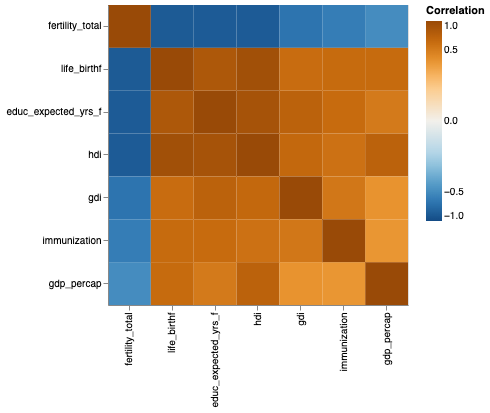

In [59]:
# melt corr_mx
corr_mx_long = corr_mx.reset_index().rename( 
    columns = {'index': 'row'}).melt(
    id_vars = 'row',
    var_name = 'col', 
    value_name = 'Correlation'
) # get to long form first

# construct plot
alt.Chart(corr_mx_long).mark_rect().encode(
    x = alt.X('col', title = '', sort = {
        'field': 'Correlation', 'order':'ascending'}),
    y = alt.Y('row', title = '', sort = {
        'field': 'Correlation', 'order':'ascending'}),
    color = alt.Color('Correlation', 
                      scale = alt.Scale(
                          scheme = 'blueorange', 
                          domain = (-1, 1), 
                          type = 'sqrt'),
                      legend = alt.Legend(tickCount = 5)) 
).properties(
    width = 300, 
    height = 300)

### Principal Components Analysis

Before we do any modeling, it is useful to identify which variables drive variation and covariation in the data. Principal component analysis (PCA) consists of choosing a small subset of components and excluding those with a weaker effect. We will compute the principal components (PC's), examine variance ratios, and determine which variables capture a majority of variation.  

In [60]:
# compute principal components
pca = PCA(data, standardize = True)

The variance ratios indicate the proportions of total variance in the data captured by each principal axis. They are computed, in order of decreasing variance, from the eigenvalues of the correlation matrix.

In [61]:
# compute variance ratios
var_ratios = pca.eigenvals/pca.eigenvals.sum()

# print
var_ratios

0    0.721384
1    0.108046
2    0.069401
3    0.055937
4    0.021705
5    0.017333
6    0.006194
Name: eigenvals, dtype: float64

About 72% of total variation is captureed by the first PC.

Next, we will graphically inspect the variance ratios and their cumulative sum, i.e., the amount of total variation captured jointly by subsets of successive components. We’ll store these quantities in a data frame.


In [62]:
# store proportion of variance explained as a dataframe
pca_var_explained = pd.DataFrame({
    'Component': np.arange(1, 8),
    'Proportion of variance explained': var_ratios})

# add cumulative sum
pca_var_explained['Cumulative variance explained'] = var_ratios.cumsum()

# print
pca_var_explained.head()

,Component,Proportion of variance explained,Cumulative variance explained
0,1,0.721384,0.721384
1,2,0.108046,0.829430
2,3,0.069401,0.898831
3,4,0.055937,0.954768
4,5,0.021705,0.976473


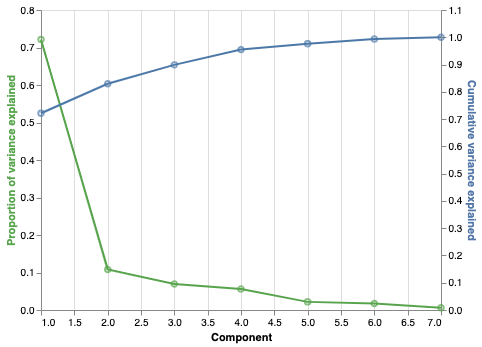

In [63]:
# encode component axis only as base layer
base = alt.Chart(pca_var_explained).encode(
     x = 'Component')

# make a base layer for the proportion of variance explained
prop_var_base = base.encode(
    y = alt.Y('Proportion of variance explained',
              axis = alt.Axis(titleColor = '#57A44C'))
)

# make a base layer for the cumulative variance explained
cum_var_base = base.encode(
    y = alt.Y('Cumulative variance explained', 
              axis = alt.Axis(titleColor ='#5276A7')) 
)

# add points and lines to each base layer
prop_var = prop_var_base.mark_line(
    stroke = '#57A44C') + prop_var_base.mark_point(color = '#57A44C')

cum_var = cum_var_base.mark_line() + cum_var_base.mark_point()

# layer the layers
var_explained_plot = alt.layer(prop_var, cum_var).resolve_scale(y ='independent')

# display
var_explained_plot

Below, we have selected the components that each explain more than 10% of total variation individually, and computed the proportion of variation they capture jointly. The first two PC's capture about 83% of total variation.

In [64]:
# number of selected components
i = pca_var_explained["Proportion of variance explained"] > .10
num_pc = pca_var_explained[i].count()[0]

# cumulative variance explained
var_explained = pca_var_explained[i].iloc[:,1].sum()

# print
print('number selected: ', num_pc)
print('proportion of variance captured: ', var_explained)

number selected:  2
proportion of variance captured:  0.8294301770602349


We will examine the loadings (ie., the weights with which the variables are combined to form the PC's) to understand *which* variables the components combine with significant weight. We will store these scores as a dataframe.

In [65]:
#  subset loadings
loading_df = pca.loadings.iloc[:, 0:num_pc]

# rename columns
loading_df = loading_df.rename(columns = dict(zip(loading_df.columns, [
    'PC' + str(i) for i in range(1, num_pc + 1)])))

# print
loading_df.head()

,PC1,PC2
fertility_total,-0.407364,0.098851
educ_expected_yrs_f,0.412409,-0.114570
life_birthf,0.416766,0.108220
hdi,0.425914,0.206444
gdi,0.340855,-0.396417


In PC1, all variables have loadings of similar magnitude. The variables with the largest loadings in PC2 are hdi and gdi, meaning that it is most representative of health, education, standard of living, and gender (in)equality. 

PCA revealed the primary sources of variation in our data. Note we are talking about total variation in the *entire* dataset, not just in a particular variable. Though useful, we should not immediately exclude the variables that were *not* included in the first 2 PC's. 

Keeping our observations in mind, we will investigate which variables drive variation in total fertity rate in the next section.


### Data Visualization

Here, we'll construct scatterplots of each covariate against total fertility to visualize potential relationships.

#### Education and fertility rate

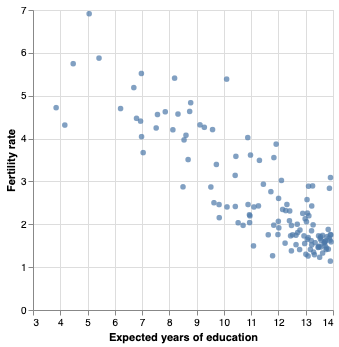

In [66]:
base = alt.Chart(data)
    
scatter_educ = base.mark_circle().encode( 
    x = alt.X("educ_expected_yrs_f:Q",
              scale = alt.Scale(zero = False),
              title = "Expected years of education"), 
    y = alt.Y("fertility_total:Q",
              title = "Fertility rate")
).properties(
    width = 300,
    height = 300)

scatter_educ

As expected, the figure shows a clear negative association between fertility rate and women’s educational attainment, and that the relationship is roughly linear. 

#### Life expectancy and fertility rate

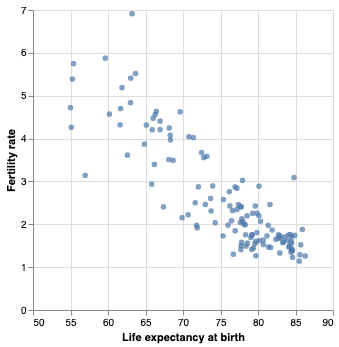

In [67]:
base = alt.Chart(data)
    
scatter_life = base.mark_circle().encode( 
    x = alt.X("life_birthf:Q",
              scale = alt.Scale(zero = False),
              title = "Life expectancy at birth"), 
    y = alt.Y("fertility_total:Q",
              title = "Fertility rate")
).properties(
    width = 300,
    height = 300)

scatter_life

Here, we also see a negative, approximately linear association between fertility rate and women's life expectancy at birth. 

#### HDI and fertility rate

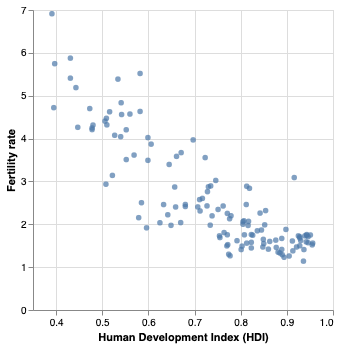

In [68]:
base = alt.Chart(data)
    
scatter_hdi = base.mark_circle().encode( 
    x = alt.X("hdi:Q",
              scale = alt.Scale(zero = False),
              title = "Human Development Index (HDI)"), 
    y = alt.Y("fertility_total:Q",
              title = "Fertility rate")
).properties(
    width = 300,
    height = 300)

scatter_hdi

We see a negative relationship between fertility rates and the HDI; it is not exactly linear, but a line should provide a good approximation.

#### GDI and fertility rate

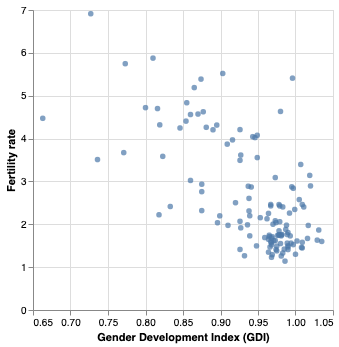

In [69]:
base = alt.Chart(data)
    
scatter_gdi = base.mark_circle().encode( 
    x = alt.X("gdi:Q",
              scale = alt.Scale(zero = False),
              title = "Gender Development Index (GDI)"), 
    y = alt.Y("fertility_total:Q",
              title = "Fertility rate")
).properties(
    width = 300,
    height = 300)

scatter_gdi

We observe a negative relationship here as well, but not necessarily linear. 

#### GDP per capita and fertility rate

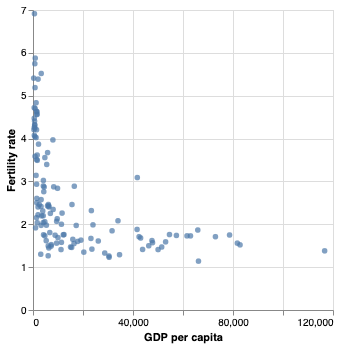

In [70]:
base = alt.Chart(data)
    
scatter_gdp = base.mark_circle().encode( 
    x = alt.X("gdp_percap:Q",
              scale = alt.Scale(zero = False),
              title = "GDP per capita"), 
    y = alt.Y("fertility_total:Q",
              title = "Fertility rate")
).properties(
    width = 300,
    height = 300)

scatter_gdp

Here, the relationship appears more like a multiplicative inverse with a lower limit of 0.

#### Immunization and fertility rate

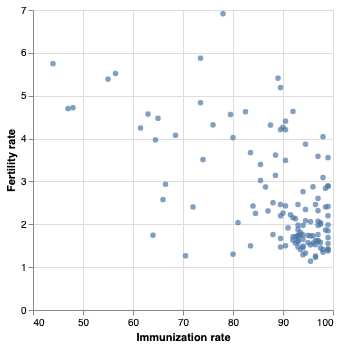

In [71]:
base = alt.Chart(data)
    
scatter_imz = base.mark_circle().encode( 
    x = alt.X("immunization:Q",
              scale = alt.Scale(zero = False),
              title = "Immunization rate"), 
    y = alt.Y("fertility_total:Q",
              title = "Fertility rate")
).properties(
    width = 300,
    height = 300)

scatter_imz

Once again a negative relationship, but more scattered than the others.

Visualization of each covariate against fertility rate confirms our observations from the correlation matrix. We see a strong, negative relationship between fertility rates with education, life expectancy, HDI, and GDI that is approximately linear; and a moderately negative assocation between fertility rates with GDP per capita and immunization that is not necessarily linear. In our modeling, we will include all variables initially and further adjust if necessary. 

## Multiple Regression Analysis

Now that we have a better idea of how the variables in our dataset impact fertility rates, it’s time to set up our model. We will set up the model, build the model and fit the data, then assess model results.

### Setting Up the Model

We will need to standardize the predictors to improve interpretability of the intercept. Since we have all quantitative predictors, the intercept will represent the average total fertility rate when all other variables are at their baseline values. Note that, because we are on a different scale, interpretations of the data will be different as well (in terms of standard deviations from the global average).

In [72]:
# create response vector
y = data.fertility_total

# create design matrix
mat = data.iloc[:,1:7]
mat = (mat-mat.mean())/mat.std()

# add col of 1's for B0
x = sm.tools.add_constant(mat)

# print first five rows of x
x.head()

,const,educ_expected_yrs_f,life_birthf,hdi,gdi,gdp_percap,immunization
Country,,,,,,,
Afghanistan,1.0,-1.863465,-1.174374,-1.440808,-4.090610,-0.724618,-1.974439
Albania,1.0,0.727045,0.596805,0.370722,0.428830,-0.509795,0.656528
Algeria,1.0,0.285146,0.317620,0.076268,-1.199929,-0.560496,-0.262223
Angola,1.0,-1.791412,-1.469967,-0.973523,-0.568968,-0.599243,-2.684383
Argentina,1.0,0.670228,0.558729,0.690780,0.736974,-0.225086,0.113630


### Model Fitting 

In [73]:
# fit model
mlr = sm.OLS(endog = y, exog = x)

# store result
rslt = mlr.fit()

The coefficient estimates are shown below. Note that a larger (negative or positive) coefficient implies a stronger association.

In [74]:
rslt.params

const                  2.604157
educ_expected_yrs_f   -0.413938
life_birthf           -0.520441
hdi                   -0.280806
gdi                   -0.097498
gdp_percap             0.157013
immunization          -0.010996
dtype: float64

The model also indicates that:

* for a country with an average level of education, life expectancy, HDI, GDI, GDP per capita, and immunization rate, the expected mean fertility rate is estimated to be 2.6 standard deviations from the global average.
* education and life expectancy appear to impact fertility rates the most. 


The error variance estimate $\hat{\sigma}^2$ is:

In [75]:
rslt.scale

0.29355712136681583

Standard errors for the coefficient estimates are shown below:

In [76]:
coef_tbl = pd.DataFrame({'estimate': rslt.params.values,
                         'standard error': np.sqrt(rslt.cov_params().values.diagonal())}, 
                        index = x.columns)

coef_tbl.loc['error variance', 'estimate'] = rslt.scale 

coef_tbl

,estimate,standard error
const,2.604157,0.047704
educ_expected_yrs_f,-0.413938,0.118133
life_birthf,-0.520441,0.137486
hdi,-0.280806,0.189329
gdi,-0.097498,0.069585
gdp_percap,0.157013,0.074161
immunization,-0.010996,0.065369
error variance,0.293557,NaN


### Model Results

In this section, we will assess model results and address ome of our initial questions, namely:

* Which indicators are most likely to be predictive of a country’s fertility rate? 
* Does improved well-being reduce individuals’ willingness to reproduce? 
* How does the upward social mobility of women impact the fertility rate? 
* How well do our selected factors predict fertility rate?   

#### Which indicators are most likely to be predictive of a country’s fertility rate? 

To answer this question, we need to inspect the model summary. In particular, we look at the p-values. They are the results of hypothesis tests for the linearity of the relationship between the response and different predictors. The smaller the p-value, the stronger the association.

In [77]:
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        fertility_total   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     95.69
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           9.77e-44
Time:                        19:16:28   Log-Likelihood:                -100.39
No. Observations:                 129   AIC:                             214.8
Df Residuals:                     122   BIC:                             234.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6042      0.048     54.590      0.000       2.510       2.699
educ_expected_yrs_f    -0.4139      0.118     -3.504      0.001      -0.648      -0.180
life_birthf            -0.5204      0.137     -3.785      0.000      -0.793      -0.248
hdi                    -0.2808      0.189     -1.483      0.141      -0.656       0.094
gdi                    -0.0975      0.070     -1.401      0.164      -0.235       0.040
gdp_percap              0.1570      0.074      2.117      0.036       0.010       0.304
immunization           -0.0110      0.065     -0.168      0.867      -0.140       0.118
==============================================================================
Omnibus:                        6.320   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.986
Skew:                           0.332   Prob(JB):                       0.0304
Kurtosis:                       3.927   Cond. No.                         9.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In general, the criteria for rejection of the null hypothesis of no linear assiciation is p < 0.05. From the summary, we see that most covariates meet this criteria, with the exception of hdi, gdi, and immunization. When taken *together*, the variables that are most predictive of fertility rates are therefore education, life expectancy, and GDP per capita. Note that these may change when we add/remove variables due to covariation among the variables.  

#### Does improved well-being reduce individuals’ willingness to reproduce?

This question requires some clarification. When we say "well-being", we mean general well-being ie., economic and health as opposed to social or psychological well-being, which are difficult to quantify. This includes indicators such as life expectancy, HDI, GDP per capita, and immunization. 

We'll convert the coefficients back to the original scale for better interpretation.

In [78]:
# create response vector
y2 = data.fertility_total

# add col of 1's for B0
x2 = sm.tools.add_constant(data.iloc[:,1:7])

# fit model
mlr2 = sm.OLS(endog = y2, exog = x2)

# store result
rslt2 = mlr2.fit()

# print coeffs
rslt2.params

const                  12.059221
educ_expected_yrs_f    -0.167391
life_birthf            -0.065186
hdi                    -1.797485
gdi                    -1.430640
gdp_percap              0.000007
immunization           -0.000918
dtype: float64

In [79]:
# comparison with original estimates
rslt.params

const                  2.604157
educ_expected_yrs_f   -0.413938
life_birthf           -0.520441
hdi                   -0.280806
gdi                   -0.097498
gdp_percap             0.157013
immunization          -0.010996
dtype: float64

Note that now we are on the original scale, as opposed to the standardized one, the results would still be the sume (ie., t-tests, F-test). Just the interpretation is different. We observe that:

* for a country with all covariates at 0, the average fertility rate is estimated to be 12.
* every one year increase in life expectancy decreases fertility rates by about 0.06 points. 
* every one point increase in HDI decreases fertility rates by about 1.8 points. 
* for every dollar increase in GDP per capita, fertility rates increase by about 0.000007 points, which is very negligible.

We can conlude from these observations that improvements in well-being negatively impacts the fertility rate, in general. But not all covariates are negatively associated with fertility rates. Just as expected, economic prospertity actually does bring about some increments in fertility rates, though not by much. Better standards of living allows women access to better healthcare and have higher rates of successes in reproduction, which can explain why we see the slight positive association.

#### How does the upward social mobility of women impact the fertility rate?

The upward social mobility of women is measured by factors such as expected years of education and GDI. We also examine HDI.

In [80]:
rslt2.params[1:5]

educ_expected_yrs_f   -0.167391
life_birthf           -0.065186
hdi                   -1.797485
gdi                   -1.430640
dtype: float64

From the coefficients, we see that both the life expectancy and the gender indicator are negatively associated with fertility rates. In addition, HDI and GDI have coefficients of the largest (negative) magnitude, while education has a moderately negative association with fertility rates. We can conclude that social mobility is, in general, negatively associated with fertility rates. 

#### How well do our selected factors explain fertility rate?

We may also be interested in how well the multiple regression model models our data. 

A metric often reported with linear models is the $R^2$ (“r-squared”) score, which is interpreted as the proportion of variation in the response captured by the model. It is also called the coefficient of multiple determination for multiple regression. 

R-squared measures the strength of the relationship between the model and the dependent variable on a 0-1.00 scale. Higher values represent smaller differences between the observed data and the fitted values ie., a better fit. 

In [81]:
rslt.rsquared

0.8247469227188053

So, our selected covariates explain approximately 82% of variability in fertility rates, which is fairly high.

The F-value (the larger the better) also indicates that our model produces a good fit.

In [82]:
rslt.fvalue

95.6893559613509

Another way to examine goodness-of-fit is through residual analysis (also a diagnostic method). The ith residual $\epsilon_i$ is the difference between the observed value of the ith response and its expected value, the latter of which is estimated from the covariates. We will plot residuals against fitted values to confirm our assumptions of constant variance and linearity. 

In [83]:
df = pd.concat([rslt.fittedvalues, rslt.resid], axis=1)
df.columns = ["fitted_values", "residuals"]
df.head()

,fitted_values,residuals
Country,,
Afghanistan,4.698059,-0.225059
Albania,1.759429,-0.142429
Algeria,2.331275,0.691725
Angola,4.374995,1.144005
Argentina,1.733520,0.527480


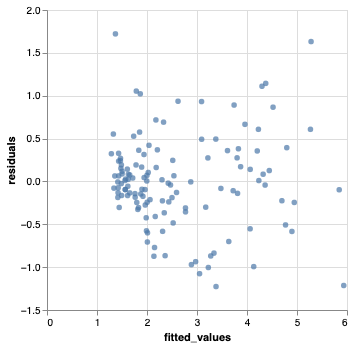

In [84]:
# residual plot
res_scatter = alt.Chart(df).mark_circle().encode( 
    x = alt.X("fitted_values:Q"),
    y = alt.Y("residuals:Q")
).properties( 
    width = 300,
    height = 300)

res_scatter

The residual plot displays homoscedasticity ie., constant error variance. There is no apparent pattern in the scatter of the residuals, and there seems to be somewhat of a symmetric distance about 0. Linearity and constant variance assumptions are probably met, which indicates that our results are likely not distorted.

## Conclusion

In this project, we investigated the phenomena of declining fertility rates across select countries in the year 2018. We had a relatively small dataset and a large number of variables that were mostly unrelated to our research questions. We tidied the dataset, conducted principal component analysis to examine variation in the data, performed exploratory analysis to visualize patterns / trends, fit a supervixed model, and evaluated the results. Through analysis, testing, and assessment, we determined that both improvements in well-being and the increasing social mobility of women are negative associated with fertility rates. Due to time constraints and the complexity of the questions addressed, we leave room for further analysis. 

The fertility rate of a country is very random and can vary widely through time. Because our model is not very robust to nuisance factors and noise, we were unable to capture a very clear picture of all the factors impacting a country's fertility rate. Our scope was also very limited, as we only focus on 2018 data. With this understanding, the next step would be to include more variables and address potential missingness, instead of simply excluding variables and observations as a whole. Then, one may fit several models of varying complexity and flexibility, and look to prediction metrics to evaluate goodness-of-fit. Another possibility is time series modeling, so that one may account for potential autocorrelation.  